# Github version

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/My\ Drive/Machine\ Learning/Github

/content/drive/My Drive/Machine Learning/Github


## Parallel envs

In [0]:
import numpy as np
from parallel_envs.make_atari import make_atari_env

In [0]:
envs = make_atari_env('MontezumaRevengeNoFrameskip-v4', num_env=3, seed=1)

In [20]:
s = envs.reset()
s.shape

(3, 4, 84, 84)

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_frame(s, num_env):
    fig, axs = plt.subplots(nrows=num_env, ncols=4, figsize=(14,14))
    plt.gray()
    for i in range(3):
        for j in range(4):
            axs[i,j].imshow(s[i,j])
            axs[i,j].grid(False)
            axs[i,j].set_title('env:{0}, frame:{1}'.format(i,j+1))
            axs[i,j].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
            

[3, 17, 14]
[0. 0. 0.]
[False False False]
({'ale.lives': 6}, {'ale.lives': 6}, {'ale.lives': 6})


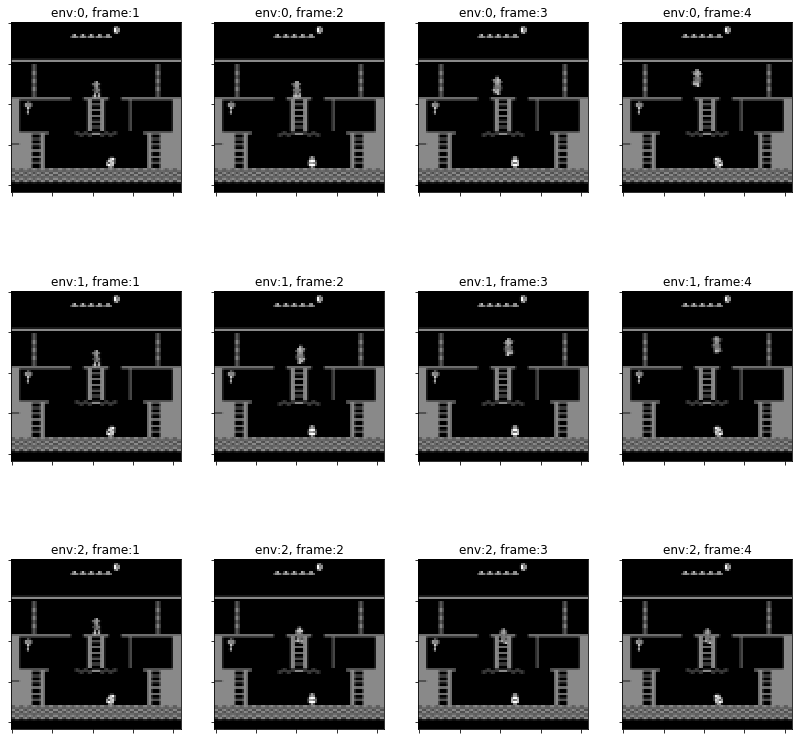

In [24]:
actions = [envs.action_space.sample() for _ in range(3)]
print(actions)
obs, r, dones, infos = envs.step(actions)
print(r)
print(dones)
print(infos)

plot_frame(obs, num_env=3)

## Env for eval

In [0]:
import numpy as np
from parallel_envs.make_atari import make_atari_env_for_eval

In [0]:
env = make_atari_env_for_eval('MontezumaRevengeNoFrameskip-v4', seed=0)

In [6]:
_s, s = env.reset()
print(_s.shape)
print(s.shape)

(210, 160, 3)
(1, 4, 84, 84)


In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_original_and_gray_stack(o_frame, frames):
    fig, axs = plt.subplots(1, ncols=5, figsize=(20,14))
    
    for i in range(4):
        axs[i].imshow(frames[0,i], plt.cm.gray)
        axs[i].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
      
    axs[4].imshow(o_frame)
    axs[4].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

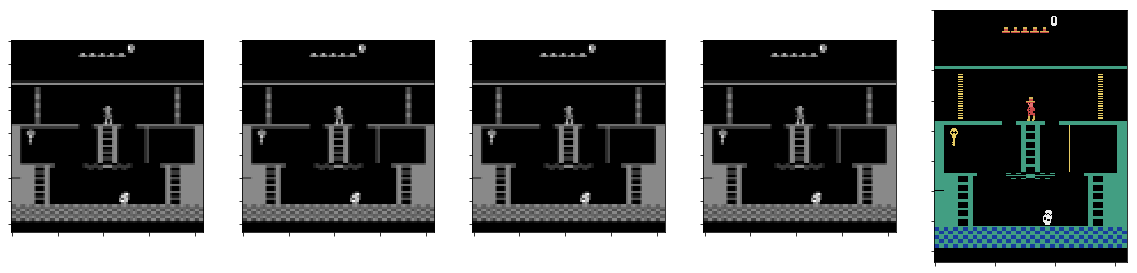

In [8]:
plot_original_and_gray_stack(_s, s)

In [0]:
_ = env.reset()

0
(210, 160, 3)
(1, 4, 84, 84)
0.0
False
{'ale.lives': 6}


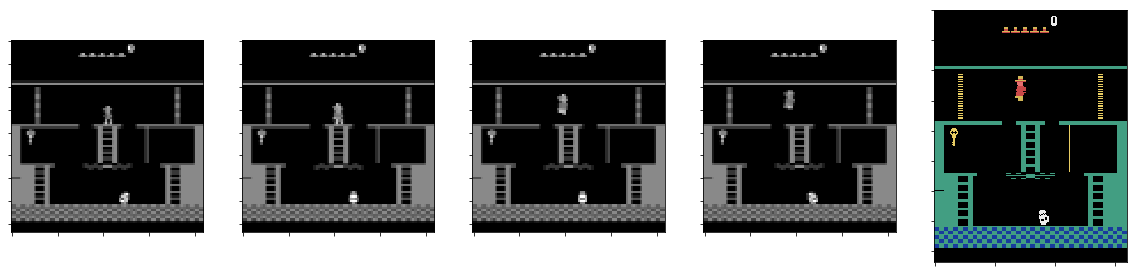

In [0]:
action = env.action_space.sample()
print(action)
(_ob, ob), r, dones, infos = env.step(action)

print(_ob.shape)
print(ob.shape)
print(r)
print(dones)
print(infos)

plot_original_and_gray_stack(_ob, np.array(ob))